In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# top 3 most correlated features with the target 'Outcome'
top_features = diabetes_df.corr()['Outcome'].abs().sort_values(ascending=False).index[1:4]

# Separate the data and labels using only the top 3 features
X = diabetes_df[top_features]
Y = diabetes_df['Outcome']

# Standardizing the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a support vector machine classifier with a linear kernel
classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
classifier.fit(X_train, Y_train)

# Calculate the accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on the training data:', training_data_accuracy)

# Calculate the accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on the test data:', test_data_accuracy)



Accuracy score on the training data: 0.7703583061889251
Accuracy score on the test data: 0.7857142857142857


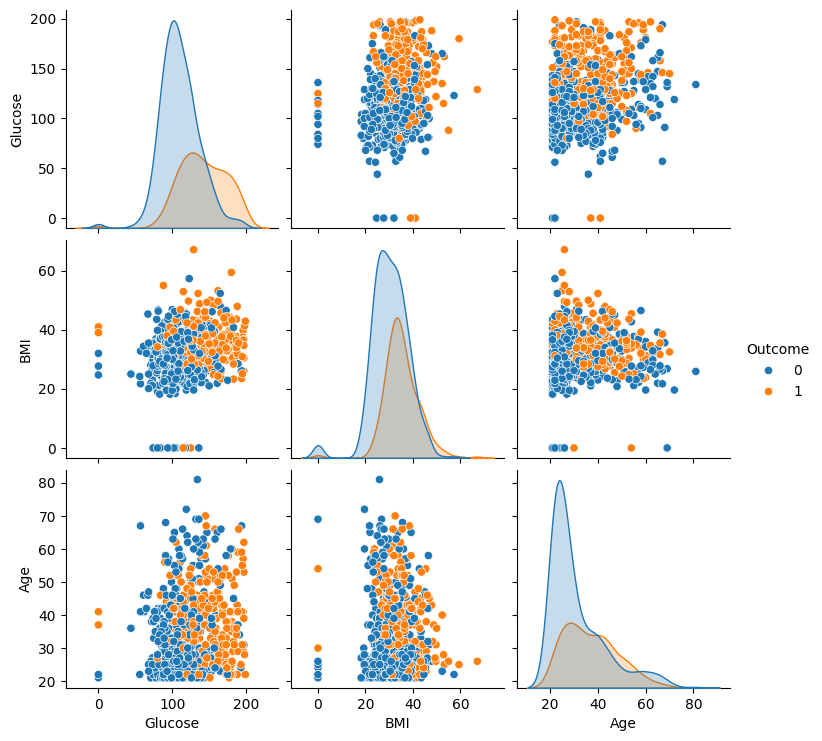

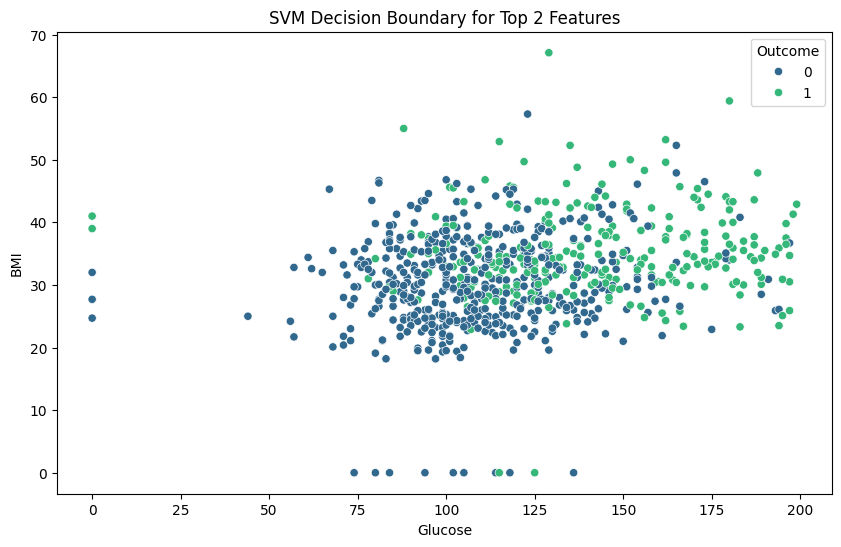

In [21]:
# Visualize the distribution of the top 3 features with respect to the target 'Outcome'
sns.pairplot(diabetes_df[top_features.append(pd.Index(['Outcome']))], hue='Outcome', diag_kind='kde')
plt.show()

# Visualize the decision boundary of the SVM model for the top 2 features
# (Note: This assumes the top_features contains at least 2 features)
if len(top_features) >= 2:
    plt.figure(figsize=(10, 6))

    # Plot the data points
    sns.scatterplot(x=top_features[0], y=top_features[1], hue='Outcome', data=diabetes_df, palette='viridis', marker='o')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    
    # Set labels and title
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.title('SVM Decision Boundary for Top 2 Features')

    plt.show()

In [22]:

# Identify the top 3 most correlated features with the target 'Outcome'
top_features = diabetes_df.corr()['Outcome'].abs().sort_values(ascending=False).index[1:4]


# Take user input for diabetes prediction using the top 3 features
print("\nEnter the details for diabetes prediction using the top 3 features:")
for feature in top_features:
    value = float(input(f'Enter value for {feature}: '))
    diabetes_df.loc[:, feature] = value

# Select only the top 3 features from the input data
input_data = diabetes_df[top_features].values

# Standardize the input data using the previously fitted scaler
std_data = scaler.transform(input_data)

# Make a prediction using the trained model
prediction = classifier.predict(std_data)

# Display the prediction result
if prediction[0] == 0:
    print('The person is not diabetic.')
else:
    print('The person is diabetic.')



Enter the details for diabetes prediction using the top 3 features:
Enter value for Glucose: 180


/var/folders/xn/1_g50z0x7z1cl56zcnwgl2sh0000gn/T/ipykernel_51137/2283320155.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  diabetes_df.loc[:, feature] = value


Enter value for BMI: 25
Enter value for Age: 28
The person is diabetic.


/Users/rudranighosh/anaconda/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


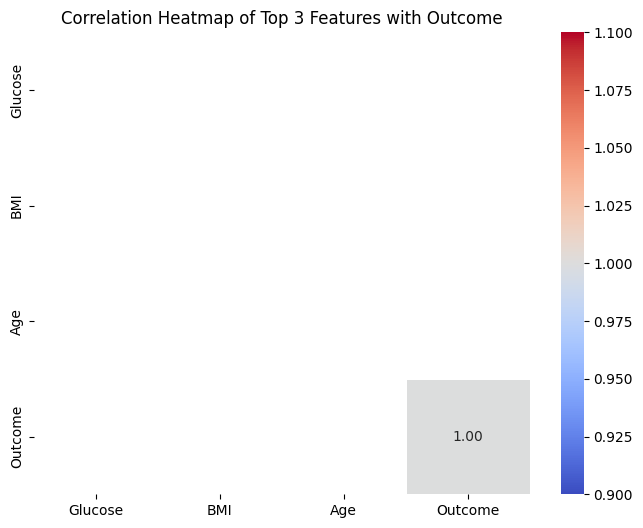

In [23]:


# Combine the top features and target for visualization
top_features_with_target = top_features.append(pd.Index(['Outcome']))

# Calculate the correlation matrix
correlation_matrix = diabetes_df[top_features_with_target].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Top 3 Features with Outcome')
plt.show()


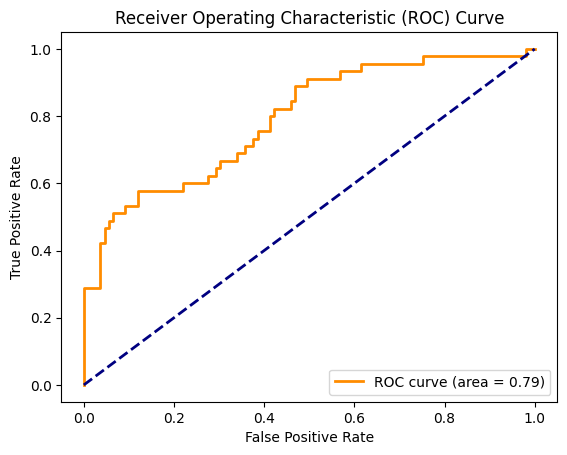

In [24]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_score = classifier.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
